This tries to partially reproduce the results from WDvS2013 paper.

However, we only use part of the data, and we use higher error tolerance so we don't expect to fully reproduce the result.

In [1]:
import numpy as np
import pycyc
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
from plotting import plot_intrinsic_vs_observed
import copy
import pickle

In [2]:
from scipy.fft import rfft, fft, fftshift, ifft, fftn, ifftn

In [3]:
# reload a module to incorporate code chanegs
import importlib
import sys
if "pycyc" in sys.modules.keys():
    importlib.reload(sys.modules["pycyc"])
import pycyc

In [4]:
CS = pycyc.CyclicSolver("P2067/chan07/53873.27864.07.15s.cyc", zap_edges = 0.05556, pscrunch=True)
CS.data.shape, CS.nspec

((236, 1, 4096, 1024), 236)

In [5]:
CS.load("P2067/chan07/53873.31676.07.15s.cyc")
CS.data.shape, CS.nspec

((468, 1, 4096, 1024), 468)

In [6]:
CS.iprint = 1
CS.initProfile()

init profile isub=0/468
init profile isub=1/468
init profile isub=2/468
init profile isub=3/468
init profile isub=4/468
init profile isub=5/468
init profile isub=6/468
init profile isub=7/468
init profile isub=8/468
init profile isub=9/468
init profile isub=10/468
init profile isub=11/468
init profile isub=12/468
init profile isub=13/468
init profile isub=14/468
init profile isub=15/468
init profile isub=16/468
init profile isub=17/468
init profile isub=18/468
init profile isub=19/468
init profile isub=20/468
init profile isub=21/468
init profile isub=22/468
init profile isub=23/468
init profile isub=24/468
init profile isub=25/468
init profile isub=26/468
init profile isub=27/468
init profile isub=28/468
init profile isub=29/468
init profile isub=30/468
init profile isub=31/468
init profile isub=32/468
init profile isub=33/468
init profile isub=34/468
init profile isub=35/468
init profile isub=36/468
init profile isub=37/468
init profile isub=38/468
init profile isub=39/468
init profi

init profile isub=320/468
init profile isub=321/468
init profile isub=322/468
init profile isub=323/468
init profile isub=324/468
init profile isub=325/468
init profile isub=326/468
init profile isub=327/468
init profile isub=328/468
init profile isub=329/468
init profile isub=330/468
init profile isub=331/468
init profile isub=332/468
init profile isub=333/468
init profile isub=334/468
init profile isub=335/468
init profile isub=336/468
init profile isub=337/468
init profile isub=338/468
init profile isub=339/468
init profile isub=340/468
init profile isub=341/468
init profile isub=342/468
init profile isub=343/468
init profile isub=344/468
init profile isub=345/468
init profile isub=346/468
init profile isub=347/468
init profile isub=348/468
init profile isub=349/468
init profile isub=350/468
init profile isub=351/468
init profile isub=352/468
init profile isub=353/468
init profile isub=354/468
init profile isub=355/468
init profile isub=356/468
init profile isub=357/468
init profile

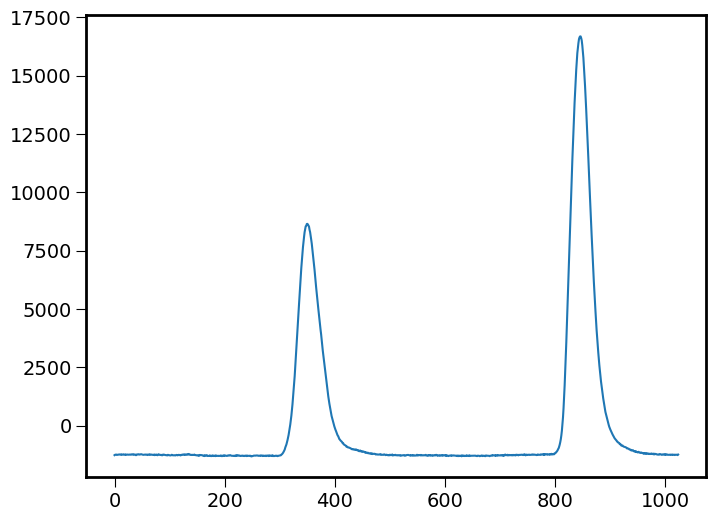

In [7]:
plt.plot(CS.pp_int)

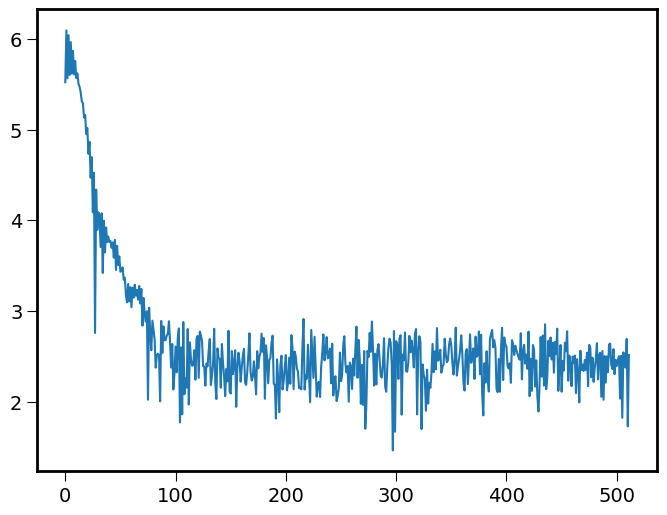

In [8]:
pp_scattered = np.copy(CS.pp_ref)
pp_fft = np.log10(np.abs(rfft(pp_scattered)))
plt.plot(pp_fft[1:])

In [9]:
filters = {}
intrinsic_profiles = {}

In [ ]:
# For first pass, either loop:

for isub in range(0, 80):
    CS.loop(isub=isub, make_plots=False, ipol=0, tolfact=10)
filters[0] = copy.deepcopy(CS.optimized_filters)
intrinsic_profiles[0] = copy.deepcopy(CS.intrinsic_profiles)

# or load up previous first pass:
# with open("filters_0.pkl", "rb") as fh:
#     filters[0] = pickle.load(fh)

# with open("profiles_0.pkl", "rb") as fh:
#     intrinsic_profiles[0] = pickle.load(fh)

initial filter: delta function at delay = 4082
onp not specified, so not using minimum phase
max filter index = 4082
variance : 7.83865e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.12828e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4082
grad: (7090.064337973711+0j) new dgrad: (750.6574174774745+0j) c: (-0.8917371209512049+0.0009514389238393077j)
merit= 1.7329279e+06  grad= 7.0900643e+03
RUNNING THE L-BFGS-B CODE
rindex 4082

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73293D+06    |proj g|=  2.62961D+01


 This problem is unconstrained.


grad: (7083.681431309195+0j) new dgrad: (747.6867814648638+0j) c: (-0.8912892061996727+0.0009532740023042683j)
merit= 1.7327596e+06  grad= 7.0836814e+03
rindex 4082
grad: (7058.184518470502+0j) new dgrad: (735.8634056626743+0j) c: (-0.8894849799567374+0.0009606793177960435j)
merit= 1.7320869e+06  grad= 7.0581845e+03
rindex 4082
grad: (6956.736381843342+0j) new dgrad: (689.5282626447238+0j) c: (-0.8820642141933721+0.0009913813907030452j)
merit= 1.7294082e+06  grad= 6.9567364e+03
rindex 4082
grad: (6558.593212182321+0j) new dgrad: (520.1486745853325+0j) c: (-0.8489299274276039+0.0011344585338748836j)
merit= 1.7188902e+06  grad= 6.5585932e+03
rindex 4082
grad: (5035.68791500023+0j) new dgrad: (105.60344916255342+0j) c: (-0.6439604173512632+0.0023947673973457716j)
merit= 1.6801102e+06  grad= 5.0356879e+03

At iterate    1    f=  1.68011D+06    |proj g|=  1.56699D+01
rindex 4082
grad: (732201.4748691914+0j) new dgrad: (99570.92267166826+0j) c: (-0.9950801852849076-0.00028982399465756875j)
m

grad: (8.537174002124368+0j) new dgrad: (46.70060754465192+0j) c: (0.07866758592414361-0.010896595015557509j)
merit= 1.5618913e+06  grad= 8.5371740e+00
rindex 4082

At iterate   33    f=  1.56189D+06    |proj g|=  3.16833D-01
grad: (1.7617922326088324+0j) new dgrad: (48.99106273566807+0j) c: (0.08914508957046743-0.003419144416894068j)
merit= 1.5618050e+06  grad= 1.7617922e+00

rindex 4082
At iterate   34    f=  1.56181D+06    |proj g|=  1.48161D-01
grad: (3.0452324244344937+0j) new dgrad: (45.48665152228814+0j) c: (0.14476862527391568+0.023583847148279612j)
merit= 1.5617266e+06  grad= 3.0452324e+00

rindex 4082
At iterate   35    f=  1.56173D+06    |proj g|=  2.16455D-01
grad: (3.056868810713916+0j) new dgrad: (47.68025501585073+0j) c: (0.08292756459832999+0.018565662229091638j)
merit= 1.5616538e+06  grad= 3.0568688e+00

At iterate   36    f=  1.56165D+06    |proj g|=  1.76088D-01
rindex 4082
grad: (3.019170576849816+0j) new dgrad: (46.02114266686316+0j) c: (0.06784616621273377+0.03594

grad: (0.7460677957155765+0j) new dgrad: (48.615789077784775+0j) c: (0.13723024307049164-0.03316645104066518j)
merit= 1.5605374e+06  grad= 7.4606780e-01

At iterate   69    f=  1.56054D+06    |proj g|=  9.38515D-02
rindex 4082
grad: (0.8232079051623714+0j) new dgrad: (49.05005830186208+0j) c: (0.11733060637339728-0.04563027644795446j)
merit= 1.5605211e+06  grad= 8.2320791e-01

At iterate   70    f=  1.56052D+06    |proj g|=  1.08279D-01
rindex 4082
grad: (0.6833395102205029+0j) new dgrad: (50.90515462615221+0j) c: (0.009212745830800667+0.0038528316394542484j)
merit= 1.5604990e+06  grad= 6.8333951e-01
rindex 4082

At iterate   71    f=  1.56050D+06    |proj g|=  8.38363D-02
grad: (0.5241532299524708+0j) new dgrad: (49.34639370387944+0j) c: (0.11581645439396877+0.04049766102406598j)
merit= 1.5604863e+06  grad= 5.2415323e-01

At iterate   72    f=  1.56049D+06    |proj g|=  7.01285D-02
rindex 4082
grad: (0.4539025099646148+0j) new dgrad: (50.99906079750872+0j) c: (0.008979608763741502+0.0

grad: (0.2581878458478619+0j) new dgrad: (53.155816450977014+0j) c: (-0.1301283838312837-0.004472608989635193j)
merit= 1.5602721e+06  grad= 2.5818785e-01

rindex 4082
At iterate  105    f=  1.56027D+06    |proj g|=  5.72550D-02
grad: (0.1743710933797544+0j) new dgrad: (51.21440273418119+0j) c: (0.09642368872093851-0.031361364460728104j)
merit= 1.5602685e+06  grad= 1.7437109e-01

At iterate  106    f=  1.56027D+06    |proj g|=  5.23833D-02
rindex 4082
grad: (0.0791780319029178+0j) new dgrad: (50.86153026334853+0j) c: (0.10670640099967428-0.006733769391991773j)
merit= 1.5602658e+06  grad= 7.9178032e-02

rindex 4082
At iterate  107    f=  1.56027D+06    |proj g|=  3.29500D-02
grad: (0.0669645723317232+0j) new dgrad: (50.94428036602079+0j) c: (0.12292575067827058+0.029262192978431505j)
merit= 1.5602636e+06  grad= 6.6964572e-02

At iterate  108    f=  1.56026D+06    |proj g|=  2.64704D-02
rindex 4082
grad: (0.11365618899164512+0j) new dgrad: (51.10093019830288+0j) c: (0.05969397175222166-0.

grad: (0.12432329321706363+0j) new dgrad: (50.83116291625902+0j) c: (0.16585273665067238-0.04058214903136995j)
merit= 1.5601948e+06  grad= 1.2432329e-01

rindex 4082
At iterate  141    f=  1.56019D+06    |proj g|=  4.35323D-02
grad: (0.04847333657608564+0j) new dgrad: (51.853880596480295+0j) c: (-0.028375106636612052-0.014759349733085347j)
merit= 1.5601930e+06  grad= 4.8473337e-02
rindex 4082

At iterate  142    f=  1.56019D+06    |proj g|=  1.82947D-02
grad: (0.03436740030384605+0j) new dgrad: (51.53733283251546+0j) c: (0.10203577946006011+0.022014184007884206j)
merit= 1.5601920e+06  grad= 3.4367400e-02

At iterate  143    f=  1.56019D+06    |proj g|=  1.71721D-02
rindex 4082
grad: (0.11153113479286325+0j) new dgrad: (52.60726404727945+0j) c: (-0.0824182579389796-0.009907483168992556j)
merit= 1.5601908e+06  grad= 1.1153113e-01

At iterate  144    f=  1.56019D+06    |proj g|=  3.17328D-02
rindex 4082
grad: (0.07618976662899671+0j) new dgrad: (51.5466513933076+0j) c: (0.0851124622000351

 This problem is unconstrained.


grad: (1555.387716203402+0j) new dgrad: (438.262934968795+0j) c: (-0.774695741527733-0.016959316880603436j)
merit= 1.6276532e+06  grad= 1.5553877e+03
rindex 4082
grad: (1519.2988443616782+0j) new dgrad: (425.94079141003556+0j) c: (-0.7701919459662698-0.017310504133450026j)
merit= 1.6273400e+06  grad= 1.5192988e+03
rindex 4082
grad: (1381.8830705898088+0j) new dgrad: (378.92407016355514+0j) c: (-0.751010143048075-0.018809991972133674j)
merit= 1.6261237e+06  grad= 1.3818831e+03
rindex 4082
grad: (934.804805940925+0j) new dgrad: (225.0131880987419+0j) c: (-0.6504549787144558-0.026715345496825492j)
merit= 1.6218291e+06  grad= 9.3480481e+02

At iterate    1    f=  1.62183D+06    |proj g|=  5.32562D+00
rindex 4082
grad: (109.40150721582563+0j) new dgrad: (41.25826625247035+0j) c: (0.0824162704554817-0.026344809384295193j)
merit= 1.6083034e+06  grad= 1.0940151e+02

rindex 4082
At iterate    2    f=  1.60830D+06    |proj g|=  8.48299D-01
grad: (65.09608500001019+0j) new dgrad: (69.469348651901

In [ ]:
with open("filters_0.pkl", "wb") as fh:
    pickle.dump(filters[0], fh)

with open("profiles_0.pkl", "wb") as fh:
    pickle.dump(intrinsic_profiles[0], fh)

In [ ]:
# three more passes through 20 minutes (80 15 sec subints):
for ipass in range(1, 4):
    CS.pp_ref = np.copy(CS.pp_int)
    CS.pp_int = np.zeros((CS.nphase))
    for isub in range(0, 80):
        CS.loop(isub=isub, make_plots=False, ipol=0, tolfact=10, hf_prev=np.copy(filters[ipass-1][isub]))
    
    filters[ipass] = copy.deepcopy(CS.optimized_filters)
    intrinsic_profiles[ipass] = copy.deepcopy(CS.intrinsic_profiles)

In [ ]:
with open(f"filters_{ipass}.pkl", "wb") as fh:
    pickle.dump(filters[ipass], fh)

with open(f"profiles_{ipass}.pkl", "wb") as fh:
    pickle.dump(intrinsic_profiles[ipass], fh)

Now pass through all the data with intrinsic profile so far (output cleared)

In [ ]:
CS.pp_ref = np.copy(CS.pp_int)
CS.pp_int = np.zeros((CS.nphase))
for isub in range(0, CS.data.shape[0]):
    CS.loop(isub=isub, make_plots=False, ipol=0, tolfact=10)

In [ ]:
filters_full = {}
intrinsic_profiles_full = {}

In [ ]:
ipass = 0
filters_full[ipass] = copy.deepcopy(CS.optimized_filters)
intrinsic_profiles_full[ipass] = copy.deepcopy(CS.intrinsic_profiles)

In [ ]:
with open(f"filters_full_{ipass}.pkl", "wb") as fh:
    pickle.dump(filters_full[ipass], fh)

with open(f"profiles_full_{ipass}.pkl", "wb") as fh:
    pickle.dump(intrinsic_profiles_full[ipass], fh)

Reproduce Figure 2 of WDvS13

In [ ]:
plot_intrinsic_vs_observed(CS, np.average(CS.data, axis=(0, 1, 2)))

Reproduce the bottom panel of Figure 7 of WDvS13

In [ ]:
avg=np.sum(abs(ifft(filters_full[0],axis=1)),axis=0)
plt.plot(np.log(avg))

Reproduce Figure 8 of WDvS13, using the wavefield derived from only the second file (subint 236 onward)

In [ ]:
subfilts=filters_full[0][236:]

Perform a backward FFT along the radio frequency to scattering delay axis, consistent with Equation 31 of WDvS13

In [ ]:
subimp = ifft(subfilts, axis=1)

Perform a forward FFT along the time (sub-integration) to doppler shift axis, consistent with the usual time-to-frequency convention

In [ ]:
wavefield = fft(subimp, axis=0)

In [ ]:
plotthis = np.log10(np.abs(fftshift(wavefield)))
plt.imshow(plotthis.T, aspect="auto", origin="lower", cmap="cubehelix_r", vmin=-2)
plt.colorbar()